# Исследование поведения пользователей мобильного приложения стартапа, продающего продукты питания. 
В наше распоряжение предоставлены данные о действиях пользователей мобильного приложения при проведении A/A/B-эксперимента.  

**В исследовании:**
- Изучим воронку продаж и воронку событий. Узнаем, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах и на каких именно шагах
- Исследуем результаты A/A/B-эксперимента, в котором исследуется поведение пользователей при изменении шрифтов во всём приложении. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. 
- При сравнении значений A и A тестов проверим наличие искажения результатов и факторы, которые к ним привели.
- Выявим и проанализуируем воронку продаж

**После чего мы запустим A/B-тест и проанализируем его результаты,** для чего осуществим следующие действия:
- выявим наличие статистически значимого различия между группами
- выясним, представлены ли предоставленные нам данные в виде нормального распредления
- выясним наличие и при наличии избавимся от аномальных значений
- проведем статистические тесты между представленными группами

**В качестве составной части А/В теста мы сформулируем и проверим гипотезы**:
- об отсутствии статистически значимого различия данных между двумя контрольными группами
- о наличии статистически значимого различия между каждой из контрольных групп и экспериментальной группой
- о наличии статистически значимого различия между объединенной контрольной группой и экспериментальной группой 

**Ход исследования:**
- Загрузка данных из предоставленных файлов с данными проведенных А/A/B-тестов и подготовка их к анализу
- Изучение общей информации о датафрейме и предобработка данных
- Исследовательский анализ данных
- Изучение воронки событий
- Анализ данных А/А/В теста 
- Проверка гипотез
- Выводы и заключения




## Загрузка и подготовка данных к анализу

Загрузим предоставленные данные о поведении покупателей из CSV-файла.

**Путь к файлу**

XXXX



Изучим данные и выполним предобработку. Есть ли в данных пропуски и дубликаты? Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратим внимание на столбцы с датой и временем.

### Импортируем библиотеки:
- **pandas**  
- **matplotlib** - для построения графиков 
- **IPython.display** для отображения данных 
- **warnings** для отключения предупреждений
- **seaborn** также для построения графиков и диаграмм
- **numpy** для отображения размерностей графиков и диаграмм
- **datetime** для работы с данными в формате даты и времени
- **scipy** для расчета статистических тестов
- **from plotly import graph_objects as go** для построения графика воронки

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import math as mth
from scipy import stats as st

import scipy.stats as stats
import datetime as dt
from plotly import graph_objects as go


### Загрузим данные из csv-файла.

Сохраним ланные в переменную **data**.  
В качестве разделителя столбцов используем соответствиующий файлу тип - **\t**

In [170]:
data = pd.read_csv(XXX)

### Выведем основную информацию о датафрейме data  и ознакомимся с ней
Заказчик сообщил нам структуру файла data:

| | | |
|:-----|:----|----:|
EventName | название события|  |
DeviceIDHash | уникальный идентификатор пользователя|  |
EventTimestamp | время события|  |
ExpId | номер эксперимента: 246 и 247 - контрольные группы, а 248 - экспериментальная|  |

  
Выведем первые строки датафрейма visits, информацию о типах данных и о пропусках  

In [171]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [173]:
print('Количество уникальных пользователей - ', len(data['DeviceIDHash'].unique()),'\n',
    'Количество уникальных событий - ',len(data['EventName'].unique()),'\n',
    'Названия уникальных событий - ',data['EventName'].unique(),'\n',
    'Названия уникальных групп - ', data['ExpId'].unique(),'\n',
    'Самая ранняя дата начала сессии - ', pd.to_datetime(data['EventTimestamp'], unit='s').min(),'\n',
    'Самая поздняя дата начала сессии- ', pd.to_datetime(data['EventTimestamp'], unit='s').max())
print('Количество записей в группе 246 - ', len(data.query('ExpId == 246')))
print('Количество записей в группе 247 - ', len(data.query('ExpId == 247')))
print('Количество записей в группе 248 - ', len(data.query('ExpId == 248')))

Количество уникальных пользователей -  7551 
 Количество уникальных событий -  5 
 Названия уникальных событий -  ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial'] 
 Названия уникальных групп -  [246 248 247] 
 Самая ранняя дата начала сессии -  2019-07-25 04:43:36 
 Самая поздняя дата начала сессии-  2019-08-07 21:15:17
Количество записей в группе 246 -  80304
Количество записей в группе 247 -  78075
Количество записей в группе 248 -  85747


In [174]:
data.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

### Краткие выводы об основной информации о датафрейме data 
В датафрейме представлены 244126 записей.   
Данные о датах представлены в формате int64 - далее мы приведем их к формату даты и времени.  
Пропущенные данные отсутствуют.  
Названия столбцов представлены не по правилам "хорошего тона" (присутствуют заглавные буквы в названиях столбцов) -  чуть дальше мы преобразуем их.   
Количество уникальных пользователей -  7551.   
Количество уникальных событий, представленных в приложении -  5.   
Количество уникальных групп - 3 - это группы 246, 247 и 248. Иные группы отсутствуют.   
Данные предоставлены за период с 25 июля по 08 августа 2019 года.   


**Таким образом предоставленных данных достаточно большое количество, чтобы провести анализ.**

## Предобработка данных.

### Преобразуем данные в столбцах с датой и временем в соответствующий тип данных
На этапе ознакомления с данными мы отметили, что данные в столбцах с датой и временем представлены в формате int64 - для их последующей обработки нам необходимо привести их к формату Datetime - обработанные данные запишем в новый столбец date_time.   
Также создадим еще один столбец - date, в который созраним дату события

In [175]:
data['date_time'] = pd.to_datetime(data['EventTimestamp'], unit='s')
data['date'] = data['date_time'].astype('datetime64[D]')
#data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   EventName       244126 non-null  object        
 1   DeviceIDHash    244126 non-null  int64         
 2   EventTimestamp  244126 non-null  int64         
 3   ExpId           244126 non-null  int64         
 4   date_time       244126 non-null  datetime64[ns]
 5   date            244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


### Выявим и при необходимости удалим дубликаты

In [177]:
data.duplicated().sum()

413

In [178]:
data = data.drop_duplicates().reset_index(drop=True)
data

,EventName,DeviceIDHash,EventTimestamp,ExpId,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
243709,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
243710,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
243711,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


Проверим.   
До удаления было 422126 записей. Удалено 413 записей. Осталось 243713 записей.   
Арифметика сходится.

### Приведем названия столбцов к нижнему регистру
Для единообразия и удобства дальнейшей обработки данных заменим названия столбцов в датафрейме orders путем приведения их к нижнему регистру

In [179]:
data.columns = data.columns.str.lower()
data.head(1)

,eventname,deviceidhash,eventtimestamp,expid,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25


### Проверим, присутствует ли один и тот же клиент в разных группах.

In [180]:
data_group_246 = data.query('expid == 246')
data_group_247 = data.query('expid == 247')
data_group_248 = data.query('expid == 248')
print('Количество уникальных пользователей в датафрейме ВСЕГО  - ', data['deviceidhash'].nunique())
print('Суммарное количество уникальных пользователей во всех группах - ', data_group_246['deviceidhash'].nunique()
     + data_group_247['deviceidhash'].nunique() + data_group_248['deviceidhash'].nunique())

Количество уникальных пользователей в датафрейме ВСЕГО  -  7551
Суммарное количество уникальных пользователей во всех группах -  7551


~~Важно заметить, что всего в базе orders 1031 уникальных клиентов и при этом в группе А присутствует 503 уникальных клиента, а в группе В - 586 уникальных клиентов (в сумме - 1089, что больше, чем 1031). Таким образом часть клиентов присутствует как в группе А, так и в группе В. Количество таких клиентов - 58, доля таких клиентов - 5,6%.~~

Отметим, что всего в базе представлено 7551 уникальных клиентов и Суммарное количество уникальных пользователей во всех группах также рсоставляет 7551 клиентов.   
Таким образом у нас:
- отсутствует присутствие одних и тех же клиентов  одновременно в двух или несколькх группах
- отсутствуют клиенты, не отнесенные ни к какой группе

### Дополним таблицу столбцом с событиями, переведенными на русский язык

In [181]:
def categorize_income(income):
    try:
        if income == "MainScreenAppear":
            return 'Появляется главный экран'
        elif income == "PaymentScreenSuccessful":
            return 'Экран оплаты успешен'
        elif income == 'CartScreenAppear':
            return 'Появляется экран корзины'
        elif income == 'OffersScreenAppear':
            return 'Появление экрана предложений'
        elif income == 'Tutorial':
            return 'Учебное пособие'
    except:
        pass

In [182]:
data['eventname_rus'] = data['eventname'].apply(categorize_income)

In [183]:
data
data.isna().sum()

eventname         0
deviceidhash      0
eventtimestamp    0
expid             0
date_time         0
date              0
eventname_rus     0
dtype: int64

### Завершая раздел предобработки данных, выделим следующее:
- В процессе предобработки выявлено:
 - присутствуют 413 дубликатов - они удалены
 - на этапе ознакомления с данными выявлено, что пропущенные данные отсутствуют
 - названия столбцов приведены к нижнему регистру
 - данные о датах  и времени преобразованы в формат Datatime 
 - уникальные клиенты не дублируются в разных группах
 - датафрейм дополнен столбцом с названием событий на русском языке
 
**Таким образом можно приступить к исследовательскому анализу данных.**

## Исследовательский анализ данных

### Посмотрим, какие события зафиксированы в нашем исследовании

In [184]:
display('Названия уникальных событий - ',data['eventname'].unique())

'Названия уникальных событий - '

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

Вот как звучат эти события в переводе на русский язык:

| | | |
|:-----|:----|----:|
«MainScreenAppear» | «Появляется главный экран»||
«PaymentScreenSuccessful» | «Экран оплаты успешен»||
«CartScreenAppear» | «Появляется экран корзины»||
«OffersScreenAppear» | «Появление экрана предложений»||
«Tutorial» | «Учебное пособие» ||


**Вывод по разделу**  
Итак, исследуемое приложение содержит 5 видов уникальных событий

### Посчитаем, сколько всего пользователей в логе и насколько равномерно они распределены между группами

Выше, в разделе Предобработки данных, мы уже выяснили, что всего в исследовании приняли участие 7551 клиент.

Проверим, насколько равномерно распределены клиенты между группами. 

In [185]:
# Посчитаем количество клиентов в каждой группе
data.groupby('expid')['deviceidhash'].agg('nunique').sort_values(ascending=False)
#display(users_pie)

expid
248    2542
247    2520
246    2489
Name: deviceidhash, dtype: int64

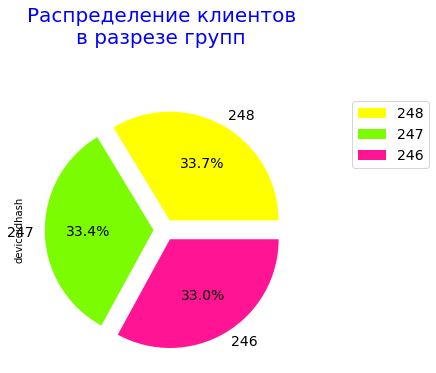

In [186]:
# Построим груговую диаграмму и увидим доли клиентов в группах
exp = (0.1,0.1,0.1)
data.groupby('expid')['deviceidhash'].agg('nunique').sort_values(ascending=False)\
            .plot(kind='pie',figsize=(5,5),colors = ['yellow','LawnGreen','DeepPink','DodgerBlue'], \
              autopct='%1.1f%%',fontsize=14, explode=exp)
plt.title('Распределение клиентов \nв разрезе групп \n\n', fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=0, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")

plt.show()

Мы можем утверждать, что клиенты распределены между группами достаточно равномерно - разница между минимальным и максимальным количеством клиентов в группе составляет = 0,7 / 33,0 = 2,21%.  
Но нужно заметить, что при проведении статистических тестов желательное различие количества клиентов в группах не должно превышать более, чем 1%, иначе выводы по результатам теста могут искажаться.

### Выясним, сколько в среднем событий приходится на пользователя
Выясним, сколько в среднем событий приходится на пользователя/   
И проверим, является распределение предоставлнных нам данных нормальным.   


~~Чтобы вычислить среднее количество событий, приходящихся на одного пользователя, разделим общее количестов событий (а оно равно количеству записей в датафрейме) на количество пользователей~~


#### Является ли распределение нормальным или таковым не является.   


##### Вычислим, сколько клиентов совершили более одного посещения главной страницы и совершили более одной покупки в каждой из контрольных групп. Как распределены клиенты по этим параметрам в разрезе групп

Сформируем переменные ```views_246``` и ```views_247```, в которых посчитаем количество посещений главного экрана, сделанные каждым покупателем в зависимости от группы.   
А в переменные ```purchase_246``` и ```purchase_247``` посчитаем количество посещений экрана успешной оплаты, сделанные каждым покупателем в зависимости от группы.   
Для удобства создадим небольшую функцию ```views_and_purchase```

In [187]:
def views_and_purchase(group, event):
# сформируем переменную view_or_purch , которая будет подсчитывать количество посещений главного экрана или
# экрана успешной оплаты, сделанные каждым покупателем в зависимости от группы

    view_or_purch = data.query('expid == @group and eventname == @event'
                   ).pivot_table(index = 'deviceidhash', values = 'eventname', aggfunc=('count')).reset_index() 
    view_or_purch.columns = ['deviceidhash', 'count']

    return view_or_purch

Вызовем функцию и рассчитаем обозначенные выше переменные

In [188]:
views_246 = views_and_purchase(246, "MainScreenAppear")
views_247 = views_and_purchase(247, "MainScreenAppear")
purchase_246 = views_and_purchase(246, "PaymentScreenSuccessful")
purchase_247 = views_and_purchase(247, "PaymentScreenSuccessful")

На примере одной из переменных проверим корректность 

In [189]:
views_246.head()

,deviceidhash,count
0,6888746892508752,1
1,6922444491712477,19
2,8740973466195562,8
3,12692216027168046,7
4,15708180189885246,27


Cформируем переменные ```distr_views_246``` и ```distr_views_247```, в которых отразим количество пользователей, открывших главный экран.   
Cформируем переменные ```distr_purchase_246``` и ```distr_purchase_247```, в которых отразим количество пользоватнлей, открывших экран успешной оплаты.  
В каждую из таблиц добавим столбец pie, в котором отразим долю посетителей

Для удобства создадим небольшую функцию ```distr_views_and_purchase```

In [190]:
def distr_views_and_purchase(view_or_purch, group):
# сформируем переменную distr_views_or_purch
# добавим столбец pie, в котором отразим долю покупателей в зависимости от количества сделанных покупок
    distr_views_or_purch = view_or_purch.pivot_table(index = 'count'
                                                     , values = 'deviceidhash', aggfunc=('count'))
    
    distr_views_or_purch['pie'] = (distr_views_or_purch['deviceidhash'
                                         ] / len(data['deviceidhash'].loc[(data['expid'] == group)].unique()))
    distr_views_or_purch.columns = ['quantity_deviceidhash', 'pie']
    #display ('Группа {} :  '.format(group), distr_views_or_purch)
    return distr_views_or_purch

In [191]:
distr_views_246 = distr_views_and_purchase(views_246, 246)
distr_views_247 = distr_views_and_purchase(views_247, 247)
distr_purchase_246 = distr_views_and_purchase(purchase_246, 246)
distr_purchase_247 = distr_views_and_purchase(purchase_247, 247)

Чуть дальше мы визуализируем распределение количества посещений главного экрана и количества оплаты заказов, приходящихся на одного пользователя.   
А сейчас ознакомимся с ТОП-10количества посещений главного экрана и оплаты заказа


In [192]:
distr_purchase = distr_purchase_246.merge(distr_purchase_247, on= 'count', suffixes=['246', '247'])
distr_purchase.head(10)

,quantity_deviceidhash246,pie246,quantity_deviceidhash247,pie247
count,,,,
1,198,8.0%,181,7.2%
2,176,7.1%,164,6.5%
3,127,5.1%,148,5.9%
4,125,5.0%,137,5.4%
5,74,3.0%,118,4.7%
6,104,4.2%,55,2.2%
7,60,2.4%,52,2.1%
8,47,1.9%,37,1.5%
9,39,1.6%,42,1.7%


In [193]:
distr_views = distr_views_246.merge(distr_views_247, on= 'count', suffixes=['246', '247'])
distr_views.head(10)

,quantity_deviceidhash246,pie246,quantity_deviceidhash247,pie247
count,,,,
1,83,3.3%,81,3.2%
2,132,5.3%,134,5.3%
3,121,4.9%,130,5.2%
4,146,5.9%,113,4.5%
5,129,5.2%,119,4.7%
6,122,4.9%,139,5.5%
7,116,4.7%,118,4.7%
8,130,5.2%,120,4.8%
9,109,4.4%,110,4.4%


Только чуть менее 30% посетителей открыли главный экран приложения от одного до пяти раз раз за время проведения теста - то есть оставшиеся 70% пользуются приложением достаточно регулярно, можно сказать, ежедневно.   
Чуть менее четверти посетителей совершили от 1 до 5 заказов за время проведения теста - то есть оставшиеся 75% совершают заказы регулярно, ежедневно или один раз в два дня (учитывая дительность проведения теста - 14 дней)   
Это может свидетельствовать о интересе пользователей к приложению.

#####  Проверка исследуемых значений  на нормальность распределения¶
На практике многие переменные далеки от нормального распределения: в них есть выбросы, игнорировать которые нельзя.
В зависимости от того - нормальное распределение данных или нет - будет выбран вид статистического теста.
Для проверки распределения на нормальность применим критерий Шапиро-Уилка.
Расчёт критерия Шапиро-Уилка встроен в стандартную библиотеку scipy.statsfrom scipy import stats as st.
Для удобства использования заключим расчёт критерия Шапиро-Уилка в функцию test_shapiro

In [194]:
def test_shapiro(sample):
    #sample_1 = orders_group_B['revenue']

    alpha = 0.05  # критический уровень статистической значимости

    results = st.shapiro(sample)
    p_value = results[ 1 ]  # второе значение в массиве результатов (с индексом 1) - p-value

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально')
    return  

Применим расчёт критерия Шапиро-Уилка для проверки распределения вычисленных выше переменных

In [195]:
test_shapiro(distr_views_246)

p-значение:  2.0728460977551035e-23
Отвергаем нулевую гипотезу: распределение не нормально


In [196]:
test_shapiro(distr_views_247)

p-значение:  4.492631880562869e-24
Отвергаем нулевую гипотезу: распределение не нормально


In [197]:
test_shapiro(distr_purchase_246)

p-значение:  1.688993556753353e-21
Отвергаем нулевую гипотезу: распределение не нормально


In [198]:
test_shapiro(distr_purchase_247)

p-значение:  1.2351720208376799e-20
Отвергаем нулевую гипотезу: распределение не нормально


**Вывод по разделу**
Распределение значений  по событиям:
- «MainScreenAppear» - «Появляется главный экран»	и   
- «PaymentScreenSuccessful» - «Экран оплаты успешен»

нормальным не является


#### Выявление границы аномальных значений

##### Гистограмма распределения частоты совершаемых событий
Построим гистограмму распределения частоты совершаемых событий
Создадим небольшую функцию для построения распределения по количеству тех или иных событий в разрезе групп

In [199]:
def orders_distr(distr_views_or_purch, ax, group, event):
    
    ax =  distr_views_or_purch.plot(y='quantity_deviceidhash'
                                        , kind = 'hist'
                                        , figsize=(10,5)
                                        ,  bins=20
                                        #, title='Распределение по сумме покупок в группе А\n'
                                        , ax=ax
                                        #, range=(0,100000)      
                                        ,grid=True, )
    #plt.legend(fontsize=14, bbox_to_anchor=(1.6, 1))
    plt.title('Распределение по событию\n{}\n  в группе {}\n'.format(event, group), fontsize=20, color = "b")
    #plt.title('Распределение по сумме \nпокупок в группе A\n', fontsize=20, color = "b")
    plt.xlabel("Количество пользователей", fontsize = 16, color = "b")
    plt.ylabel("Количество событий", fontsize = 16, color = "b")
    #plt.show()

    return

Совместим две диаграммы на одном графике,   
Вызовем функцию и построим графики распределения по событию «MainScreenAppear» («Появляется главный экран») в группах тестирования

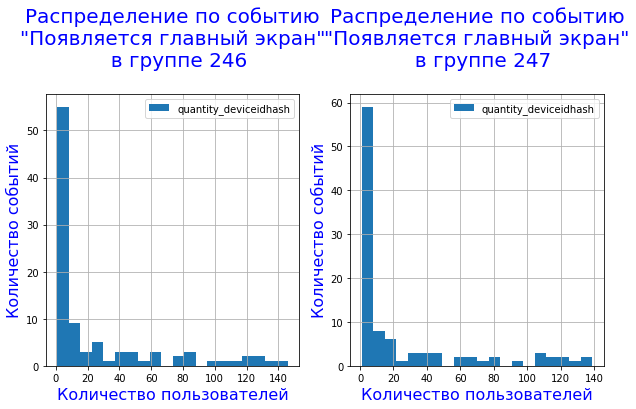

In [200]:
# задаём размер сетки для графиков
plt.figure(figsize=(35, 8))
# в первой ячейке строим распределение по группе А
ax1 = plt.subplot(1, 2, 1)
# вызываем функцию 
orders_distr(distr_views_246, ax1, 246, '\"Появляется главный экран\"')
# во второй ячейке строим распределение по группе В
ax2 = plt.subplot(1, 2, 2)
# вызываем функцию
orders_distr(distr_views_247, ax2, 247, '\"Появляется главный экран\"')

И также построим графики распределения по событию «PaymentScreenSuccessful» («Экран оплаты успешен») в группе тестирования

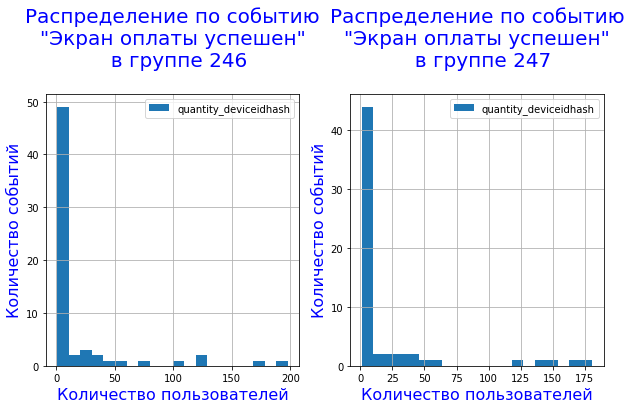

In [201]:
# задаём размер сетки для графиков
plt.figure(figsize=(35, 8))
# в первой ячейке строим распределение по группе А
ax1 = plt.subplot(1, 2, 1)
# вызываем функцию 
orders_distr(distr_purchase_246, ax1, 246, '\"Экран оплаты успешен\"')
# во второй ячейке строим распределение по группе В
ax2 = plt.subplot(1, 2, 2)
# вызываем функцию
orders_distr(distr_purchase_247, ax2, 247, '\"Экран оплаты успешен\"')

Гистограммы убедительно показываю нам, что распределение посещения главного экрана и экрана оплаты в обеих группах не является нормальным. Присутствуют выбросы.
Как мы ранее уже отметили, абсолютное большинство пользователей приложения посетили главный экран от одного до пяти раз. Но есть пользователи, посетившие главный экран 40, 80 и даже 140 раз.  Являются ли эти значения аномальными и нужно ли их оставить для рассмотрения результатов теста - мы решим в этом разделе исследования несколько позже.   
Также ранее мы отмечали и видим здесь наглядное подтверждение того, что абсолютное большинство пользователей приложения совершили оплату заказа от одного до десяти раз (более детально нам не позволяет сейчас увидеть масштаб гистограммы). Но мы видим значения не только аномальные, к примеру, 50 заказов, но и значения явно ошибочные - 175 или 200 заказов. В исследовании отсутствуют посетители, которые сделали бы количество просмотров главной страницы достаточное для такого количества заказов.  Мы также чуть далее определим границу аномальных значений по этому событию.   
  


##### "Ящик с усами"
Создадим еще одну функцию, на этот раз для построения "ящика с усами" в разрезе групп

In [202]:
def orders_box(distr_views_or_purch, ax, group, event):
    
    ax =  distr_views_or_purch.boxplot(['quantity_deviceidhash'], figsize=(5,5))
    plt.title('Диапазон нормальных \nзначений в группе A\n', fontsize=20, color = "b")
    plt.title('Распределение по событию\n{}\n  в группе {}\n'.format(event, group), fontsize=20, color = "b")
    plt.ylabel("Количество событий", fontsize = 16, color = "b")

    return

Совместим две диаграммы на одном графике,   
Вызовем функцию и построим графики бокс-плот по событию «MainScreenAppear» («Появляется главный экран») в группах тестирования

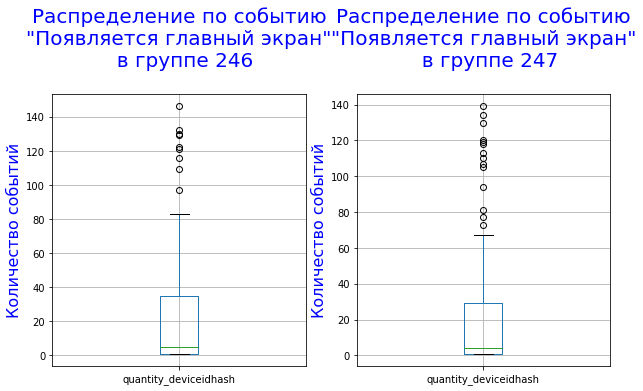

In [203]:
# задаём размер сетки для графиков
plt.figure(figsize=(10, 5))
# в первой ячейке строим распределение по группе А
ax1 = plt.subplot(1, 2, 1)
# вызываем функцию 
orders_box(distr_views_246, ax1, 246, '\"Появляется главный экран\"')
# во второй ячейке строим распределение по группе В
ax2 = plt.subplot(1, 2, 2)
# вызываем функцию
orders_box(distr_views_247, ax2, 247, '\"Появляется главный экран\"')

И также построим графики распределения по событию «PaymentScreenSuccessful» («Экран оплаты успешен») в группе тестирования

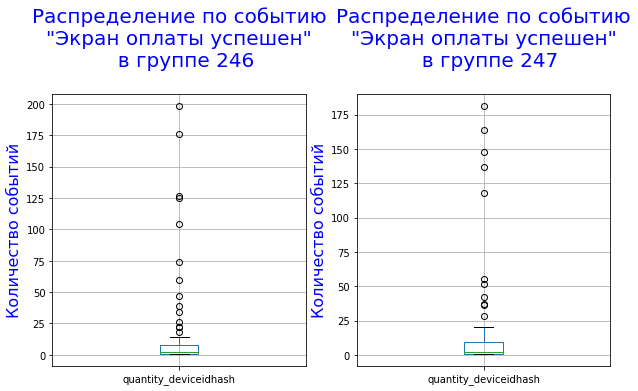

In [204]:
# задаём размер сетки для графиков
plt.figure(figsize=(10, 5))
# в первой ячейке строим распределение по группе А
ax1 = plt.subplot(1, 2, 1)
# вызываем функцию 
orders_box(distr_purchase_246, ax1, 246, '\"Экран оплаты успешен\"')
# во второй ячейке строим распределение по группе В
ax2 = plt.subplot(1, 2, 2)
# вызываем функцию
orders_box(distr_purchase_247, ax2, 247, '\"Экран оплаты успешен\"')

На построенных графиках мы видим:
- при событии "Появляется главный экран" зона выбросов находится выше значения примерно 90 событий
- при событии "Экран оплаты успешен" зона выбросов находится выше значения примерно 25 событий

##### Точечная диаграмма числа событий
Чтобы определить верхнюю границу событий и отбросить выбросы, построим точечную диаграмму числа событий на одного пользователя.

Для этой цели вновь создадим функци,  назовем ее ```scatter_views_and_purchase``` 

In [205]:
def scatter_views_and_purchase(views_or_purchase, ax, group, event, y_limit):
    x_values = pd.Series(range(0,len(views_or_purchase)))

    plt.scatter(x_values, views_or_purchase['count'])

    plt.title('Точечная диаграмма числа \nзаказов на одного пользователя \n', fontsize=20, color = "b")
    plt.title('Точечная диаграмма \nпо событию\n{}\n  в группе {}\n'.format(event, group), fontsize=20, color = "b")
    #plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
    plt.xticks(rotation=0, fontsize=12, color = "b")
    plt.yticks(rotation=0, fontsize=12, color = "b")
    plt.xlabel("Расположение пользователя\n (номер) в датафрейме", fontsize=14, color = "b")
    plt.ylabel("Количество событий", fontsize=14, color = "b")
    plt.ylim(0,y_limit)
    #plt.show()
    return

Совместим две диаграммы на одном графике,   
Вызовем функцию и построим точечные диаграммы по событию «MainScreenAppear» («Появляется главный экран») в группах тестирования

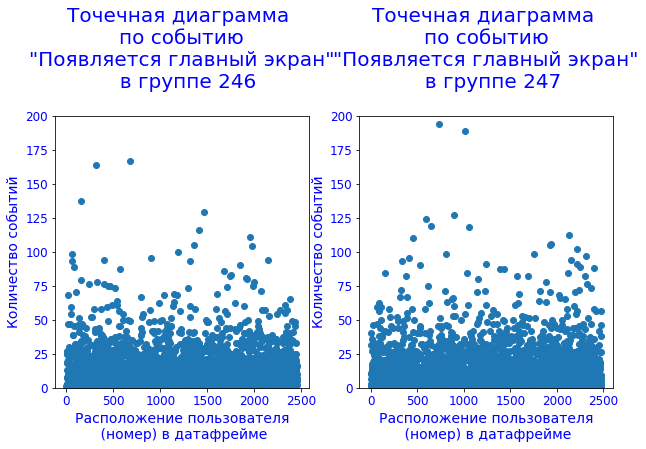

In [206]:
# задаём размер сетки для графиков
plt.figure(figsize=(10, 5))
# в первой ячейке строим распределение по группе А
ax1 = plt.subplot(1, 2, 1)
# вызываем функцию 
scatter_views_and_purchase(views_246, ax1, 246, '\"Появляется главный экран\"',200)
# во второй ячейке строим распределение по группе В
ax2 = plt.subplot(1, 2, 2)
# вызываем функцию
scatter_views_and_purchase(views_247, ax2, 247, '\"Появляется главный экран\"',200)

И также построим точечные диаграммы по событию «PaymentScreenSuccessful» («Экран оплаты успешен») в группе тестирования

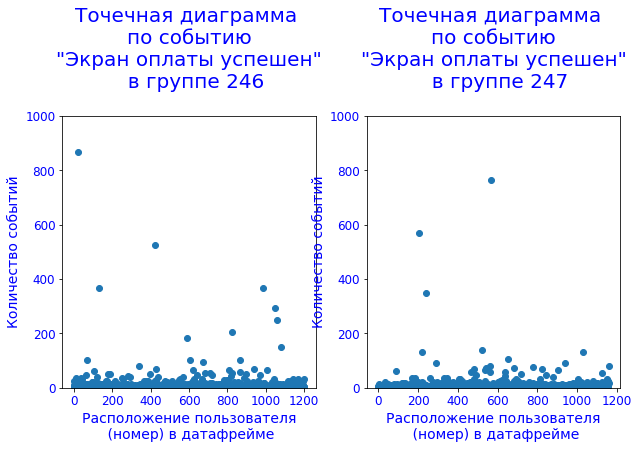

In [207]:
# задаём размер сетки для графиков
plt.figure(figsize=(10, 5))
# в первой ячейке строим распределение по группе А
ax1 = plt.subplot(1, 2, 1)
# вызываем функцию 
scatter_views_and_purchase(purchase_246, ax1, 246, '\"Экран оплаты успешен\"',1000)
# во второй ячейке строим распределение по группе В
ax2 = plt.subplot(1, 2, 2)
# вызываем функцию
scatter_views_and_purchase(purchase_247, ax2, 247, '\"Экран оплаты успешен\"',1000)

Выбросы со значениями более 200 событий - это явная ошибка в данных - столько нет даже просмотров главного экрана   
Ограничим количество событий значением 100 и заново построим точечные диаграммы по событию «PaymentScreenSuccessful» («Экран оплаты успешен»)

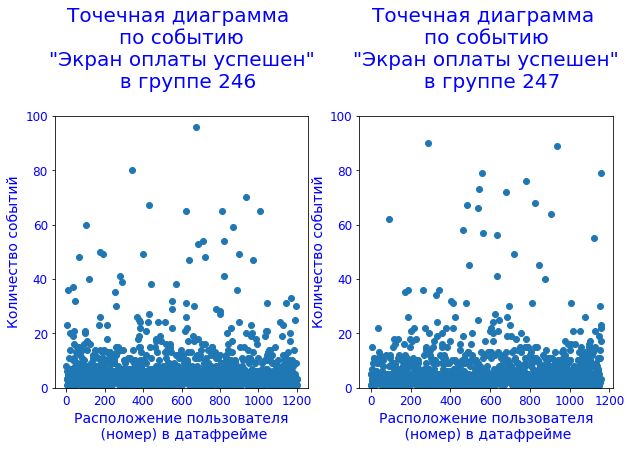

In [208]:
# задаём размер сетки для графиков
plt.figure(figsize=(10, 5))
# в первой ячейке строим распределение по группе А
ax1 = plt.subplot(1, 2, 1)
# вызываем функцию 
scatter_views_and_purchase(purchase_246, ax1, 246, '\"Экран оплаты успешен\"',100)
# во второй ячейке строим распределение по группе В
ax2 = plt.subplot(1, 2, 2)
# вызываем функцию
scatter_views_and_purchase(purchase_247, ax2, 247, '\"Экран оплаты успешен\"',100)

**Вывод по разделу**   
- для события "Появляется главный экран" будет разумным допустить, что количество событий более 50 является аномальным
- для события "Экран оплаты успешен":
 - будет разумным допустить, что количество событий более 20 является аномальным
 - присутствуют ошибочные данные


##### Определение границы аномальных значений. Расчет персентилей. 
Посчитаем 95-й и 99-й перцентили количества событий. Выберем границу для определения аномальных пользователей.



Определим 90, 95 и 99 перцентили количества заказов на одного пользователя:

In [209]:
def percentile_views_and_purchase(views_or_purchase, group, event):  
    print('Перцентили по событию {} в группе {}: '.format(event, group)
          , np.percentile(views_or_purchase['count'], [90, 95, 99]))
    #print(np.percentile(views_or_purchase['count'], [90, 95, 99]))

In [210]:
percentile_views_and_purchase(views_246, 246, '\"Появляется главный экран\"')
percentile_views_and_purchase(views_247, 247, '\"Появляется главный экран\"')
percentile_views_and_purchase(purchase_246, 246, '\"Экран оплаты успешен\"')
percentile_views_and_purchase(purchase_247, 246, '\"Экран оплаты успешен\"')

Перцентили по событию "Появляется главный экран" в группе 246:  [33. 43. 78.]
Перцентили по событию "Появляется главный экран" в группе 247:  [33.   45.   84.57]
Перцентили по событию "Экран оплаты успешен" в группе 246:  [15.   24.95 95.84]
Перцентили по событию "Экран оплаты успешен" в группе 246:  [14.   21.05 74.23]



- для события "Появляется главный экран" расчет показывает, что 95% пользователей не делают более, чем 42-45 посещений , что коррелируется с точечной диаграммой.
- для события "Экран оплаты успешен" расчет показывает, что 95% пользователей не делают более, чем 21-25 заказов , что коррелируется с точечной диаграммой.


**Вывод по разделу**   
Выберем значение 95-го перцентиля на одного пользователя за верхнюю границу количеств всех уникальных событий.   
При проведении дальнейших расчетов отсеем аномальные значения.

### Вспомним, за какой период нам предоставлены данные. 
Выше, в разделе Предобработки данных, мы выяснили, что исследование ппроводилось в период с 25 июля по 07 августа 2019 года.


### Изучите, как меняется количество данных: постройте столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. 


Для удобной и читаемой визуализации дат при построении графиков временно придадим значениям в столбце ```data['date']``` тип данных - строчный.

In [211]:
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')
data['date'].head(1)

0    2019-07-25
Name: date, dtype: object

#### Диаграмма изменения событий в зависимости от времени для всех пользователей.
Сначала построим диаграмму изменения событий в зависимости от времени для всех пользователей.

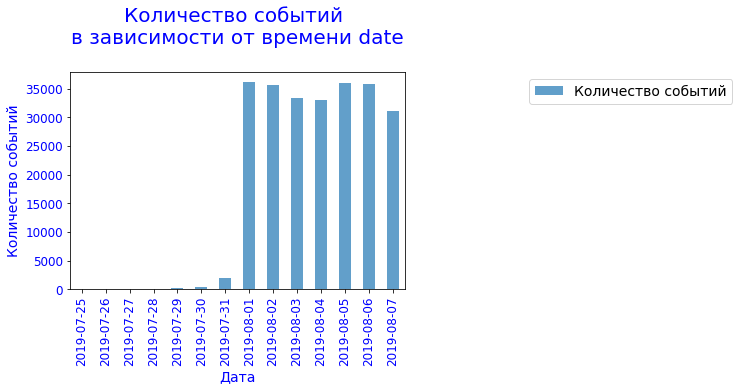

In [212]:
    
    # строим столбчатую диаграмму, отражающую количество событий в зависимости от времени
t1 = data.groupby('date').agg({'eventname':'count'}).sort_values('date')#.sort_values('payer', ascending=False)
    ax = t1.plot(
    kind='bar',
    y='eventname',
    linewidth=5,
    alpha=0.7, 
    label='Количество событий'
    )
    
#    fig, ax = plt.subplots(figsize = (12,6))
#    fig = sns.barplot(x='date', y='eventname', hue='group', data=df, ax=ax)
#    ax.set_xticklabels(labels=data['date'].dt.strftime('%Y-%m-%d').sort_values().unique(),rotation=45, ha='right')

    plt.title('Количество событий \nв зависимости от времени {}\n'.format('date'), fontsize=20, color = "b")
    plt.legend(fontsize=14, bbox_to_anchor=(2, 1))
    plt.xticks(rotation=90, fontsize=12, color = "b")
    plt.yticks(rotation=0, fontsize=12, color = "b")
    plt.xlabel('Дата', fontsize=14, color = "b")
    plt.ylabel("Количество событий", fontsize=14, color = "b")
    plt.show()

Поскольку данные до 31 июля плохо визуализируются, построим еще одну диаграмму с ограничение значений по оси у

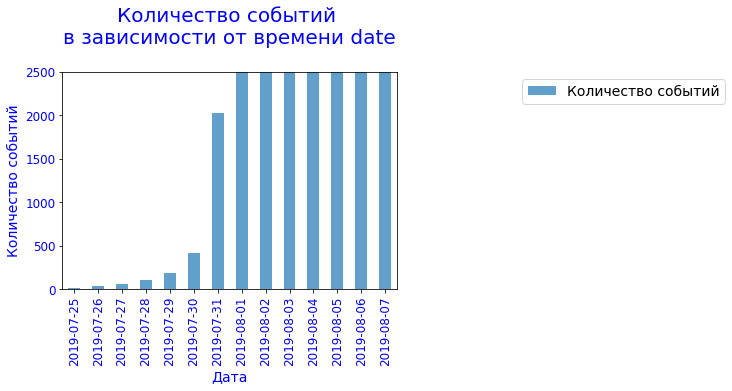

In [213]:
    
    # строим столбчатую диаграмму, отражающую количество событий в зависимости от времени
t1 = data.groupby('date').agg({'eventname':'count'}).sort_values('date')
    ax = t1.plot(
    kind='bar',
    y='eventname',
    linewidth=5,
    alpha=0.7, 
    label='Количество событий'
    )
    plt.title('Количество событий \nв зависимости от времени {}\n'.format('date'), fontsize=20, color = "b")
    plt.legend(fontsize=14, bbox_to_anchor=(2, 1))
    plt.xticks(rotation=90, fontsize=12, color = "b")
    plt.yticks(rotation=0, fontsize=12, color = "b")
    plt.xlabel('Дата', fontsize=14, color = "b")
    plt.ylabel("Количество событий", fontsize=14, color = "b")
    plt.ylim(0,2500)
    plt.show()

Мы видим, что количество событий до 31 июля включительно и начиная с 1 августа разительно отличаются.   
Событий в июле значительно меньше.   

#### Диаграмма событий в разрезе групп
Рассмотрим диаграмму событий в разрезе групп

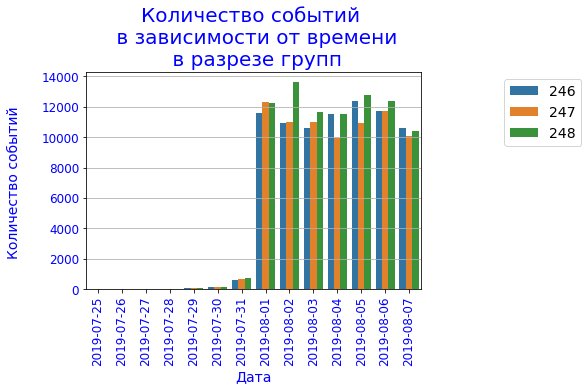

In [214]:
    # строим столбчатую диаграмму, отражающую количество событий в разрезе групп в зависимости от времени
    #создаем переменные, соотвтетсвующие каждой группе
t1 = data.query('expid == 246').groupby('date').agg({'eventname':'count'})
t2 = data.query('expid == 247').groupby('date').agg({'eventname':'count'})
t3 = data.query('expid == 248').groupby('date').agg({'eventname':'count'})


# в каждую из переменных добавляем новый столбец group, в который заносим номер группы
t1['group'] = 246
t2['group'] = 247
t3['group'] = 248

#объединяем таблицы
df = pd.concat([t1, t2, t3]).sort_values('date')
df=df.reset_index()

# пытаемся применить округление - оно не срабатывает
#df['date'] = df['date'].dt.round('D')

# строим групповую столбчатую диаграмму

sns.barplot(x='date', y='eventname', hue='group',  data=df)
plt.title('Количество событий \n в зависимости от времени\n в разрезе групп'.format('date'), fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=90, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel('Дата', fontsize=14, color = "b")
plt.ylabel("Количество событий \n", fontsize=14, color = "b")
plt.grid(which='major', axis='y')
plt.show()


Аналогично построим диаграмму с ограничением по оси у

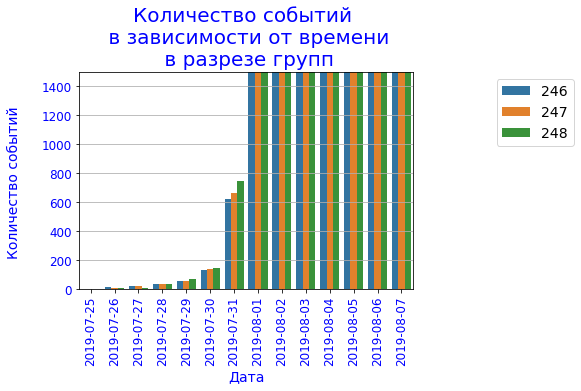

In [215]:
# строим групповую столбчатую диаграмму

sns.barplot(x='date', y='eventname', hue='group',  data=df)
plt.title('Количество событий \n в зависимости от времени\n в разрезе групп'.format('date'), fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=90, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel('Дата', fontsize=14, color = "b")
plt.ylabel("Количество событий \n", fontsize=14, color = "b")
plt.grid(which='major', axis='y')
plt.ylim(0,1500)
plt.show()


Как и в исследовании без разбивки по группам мы видим, что в июле действий несоизмеримо - на порядок - меньше, чем в августе.  Так, 31 июля мы наблюдаем в каждой группе от 600 до 800 событий, в уже 1 августа - 12000 событий в каждой группе.  

Отметим также наличие значительного различия в количестве действий в контрольных группах (246 и 247) в даты 1, 4 и 5 августа. Если между значениями A и A имеются существенные различия, это может обнаружить факторы, которые привели к искажению результатов.  
Здесь же отметим, что в исследовании присутствуют пользователи всех трех групп.   

Вспомним, что в настоящем исследовании мы рассматриваем продажу продуктов питания - то есть сфера товаров повседневного пользования, где пользователи принимаю решение о покупке в короткий срок - в пределах одних суток.  Таким образом, мы не можем отнести малое количество данных в июле на "вызревание" клиентов - как это может быть при приобретении дорогостоящих товаров длительного пользования.   
Вероятная причина выявленного различия - запоздание маркетинговых мероприятий. Ведь в противном случае с начала теста мы могли бы видеть по крайней мере события «MainScreenAppear» -	«Появляется главный экран»  

**Построенные графики позволяют нам утверждать, что в период с начала теста до 31 июля включительно данные теста представлены в незначительном объеме и не могут быть приняты к дальнейшему рассмотрению.**

#### Диаграмма в разбивке по событиям
Построим здесь же и диаграмму событий в зависимости от времени в разбивке по собственно событиям


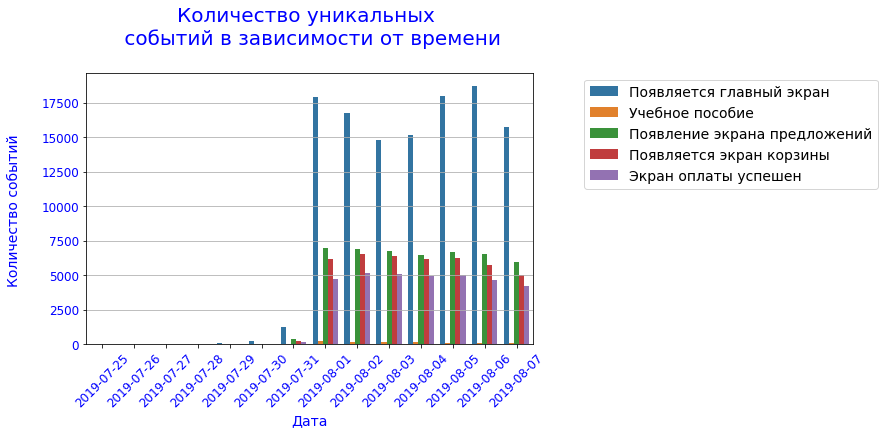

In [216]:
#создаем переменные, соотвтетсвующие каждой группе
t21 = data.query('eventname == "MainScreenAppear"').groupby('date').agg({'eventname':'count'})
t22 = data.query('eventname == "Tutorial"').groupby('date').agg({'eventname':'count'})
t23 = data.query('eventname == "OffersScreenAppear"').groupby('date').agg({'eventname':'count'})
t24 = data.query('eventname == "CartScreenAppear"').groupby('date').agg({'eventname':'count'})
t25 = data.query('eventname == "PaymentScreenSuccessful"').groupby('date').agg({'eventname':'count'})
# в каждую из переменных добавляем новый столбец group, в который заносим наименование события
t21['group'] = "MainScreenAppear"
t22['group'] = "Tutorial"
t23['group'] = "OffersScreenAppear"
t24['group'] = "CartScreenAppear"
t25['group'] = "PaymentScreenSuccessful"
t21['group'] = "Появляется главный экран"
t22['group'] = "Учебное пособие"
t23['group'] = "Появление экрана предложений"
t24['group'] = "Появляется экран корзины"
t25['group'] = "Экран оплаты успешен"
#объединяем таблицы
df = pd.concat([t21, t22, t23, t24, t25])
#df['date'] = df['date'].dt.round('H')
df=df.reset_index()
# строим групповую столбчатую диаграмму
plt.figure(figsize=(8, 5))

#fig, ax = plt.subplots(figsize = (12,6))
#fig = sns.barplot(x='date', y='eventname', hue='group', data=df, ax=ax)
#ax.set_xticklabels(labels=data['date'].dt.strftime('%Y-%m-%d').sort_values().unique(),rotation=45, ha='right')

sns.barplot(x='date', y='eventname', hue='group',  data=df)
plt.title('Количество уникальных \n событий в зависимости от времени\n '.format('date'), fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=45, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel('Дата', fontsize=14, color = "b")
plt.ylabel("Количество событий \n", fontsize=14, color = "b")
plt.grid(which='major', axis='y')
plt.show()

В подтверждение вышесказанного мы видим, что просмотры главного экрана начались в полном объеме только 1 августа.  
Также мы можем наблюдать воронку - переход от просмотра главного экрана на экран предложений, далее на экран корзины и на экран оплаты.  
И можем приблизительно оценивать конверсии как в целом, так и на каждом этапе.

### Оставим для исследования только данные с 1 августа


In [217]:
# Сохраним в переменную len_before количество событий, а в переменную dev_before - количество пользователей
# до удаления результатов до 1 августа
len_before = len(data)
dev_before = data['deviceidhash'].nunique()
# Оставим в датафрейме data события только после 1 августа
data = data.query('date_time >= "2019-08-01"').reset_index(drop=True)
# проверим, какое количество событий и пользователей мы удалили 
# и какую долю они составляют к изначальному количеству соответственно событий и пользователей
print('Количество удаленных событий',len(data) - len_before,
     '\nДоля удаленных событий {0:.01%}'.format(abs(len(data) / len_before -1))  )
print('Количество удаленных пользователей',data['deviceidhash'].nunique() - dev_before,
     '\nДоля удаленных пользователей {0:.01%}'.format(abs(data['deviceidhash'].nunique() / dev_before -1))  )


Количество удаленных событий -2826 
Доля удаленных событий 1.2%
Количество удаленных пользователей -17 
Доля удаленных пользователей 0.2%


Итак, мы исключили из дальнейшего рассмотрения 1,2% событий и 0,2% пользователей, что вполне допустимо для исследования и не исказит его результаты


Вернем столбцу date в датафрейме data тип в формате дата-время.

In [218]:
data['date'] = data['date_time'].astype('datetime64[D]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240887 entries, 0 to 240886
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   eventname       240887 non-null  object        
 1   deviceidhash    240887 non-null  int64         
 2   eventtimestamp  240887 non-null  int64         
 3   expid           240887 non-null  int64         
 4   date_time       240887 non-null  datetime64[ns]
 5   date            240887 non-null  datetime64[ns]
 6   eventname_rus   240887 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 12.9+ MB


**Вывод по разделу**
Исследовательский анализ предоставленных данных  показал следующее:
-	В датафрейме представлены 5 событий, из них 4 события образуют воронку событий.<br>
-	Клиенты распределены между группами достаточно равномерно - разница между минимальным и максимальным количеством клиентов в группе составляет 2,21%.  Нужно заметить, что при проведении статистических тестов желательное различие количества клиентов в группах не должно превышать более, чем 1%, иначе выводы по результатам теста могут искажаться.<br>
-	Данные предоставлены за период с 25 июля по 7 августа 2019 года. Данные за период до 31 июля включительно удалены нами из исследования, поскольку в этот период данные теста представлены в незначительном объеме и не могут быть приняты к дальнейшему рассмотрению. <br>
-	Визуализируется наличие значительного различия в количестве действий в контрольных группах (246 и 247) в даты 1, 4 и 5 августа. Если между значениями A и A имеются существенные различия, это может обнаружить факторы, которые привели к искажению результатов.br>
-	Визуализируется воронка событий - переход от просмотра главного экрана на экран предложений, далее на экран корзины и на экран оплаты.<br>


## Воронка событий
Изучим воронку событий

### Какие события есть в логах.
Посмотрим, какие события присутствуют и как часто они встречаются в логах.   
Отсортируйте события по частоте.

В предыдущем разделе мы пострили столбчатую диаграмму, отражающую количество уникальных событий в зависимости от времени и отметили, что построенная диаграмма наглядно отображает воронку событий и частоту этих событий.  
Давайте визуализируем, насколько часто каждое из событий присутствует в тесте в целом за период исследования (конечно, после отсечения данных до 1 августа)

In [219]:
eventname_pie = data.groupby(by='eventname_rus')['eventname_rus'].agg({'count'})
eventname_pie['pie'] = round(eventname_pie['count']/eventname_pie['count'].sum()*100, 1)
#eventname_pie['pie'] = ('{0:.01%}').format(eventname_pie['count']/eventname_pie['count'].sum())
eventname_pie.sort_values('pie', ascending = False)

,count,pie
eventname_rus,,
Появляется главный экран,117328,4870.0%
Появление экрана предложений,46333,1920.0%
Появляется экран корзины,42303,1760.0%
Экран оплаты успешен,33918,1410.0%
Учебное пособие,1005,40.0%


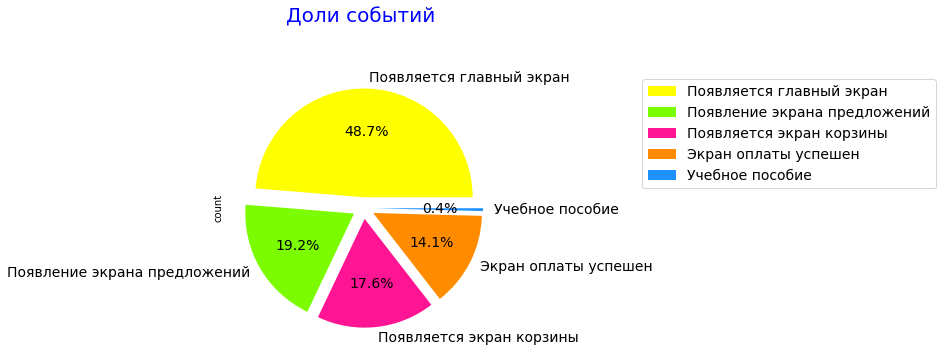

In [220]:
# Построим груговую диаграмму и увидим доли событий в тесте
exp = (0.1,0.1,0.1,0.1,0.1)

eventname_pie.sort_values('pie', ascending = False
                         ).plot(kind='pie', y = 'count', figsize=(5,5)
                         ,colors = ['yellow','LawnGreen','DeepPink','Darkorange','DodgerBlue'],\
                          autopct='%1.1f%%',fontsize=14, explode=exp)
plt.title('Доли событий \n\n', fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=0, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")

plt.show()

Как мы уже видели ранее, почти половина событий - это "Появление главного экрана" - точки входа в мобильное прилоджение.   
И всего лишь 0,4% пользователей открывали "Учебное пособие"))

### Cколько пользователей совершали каждое из этих событий.
Посчитаем, сколько пользователей совершали каждое из событий.  
Посчитаем долю пользователей, которые хоть раз совершали событие.

In [221]:
# Количество пользователей, которые совершали каждое из событий.
user_name_pie = data.groupby(by='eventname_rus')['deviceidhash'].agg({'nunique'})
# Для расчета доли пользователей, которые хоть раз совершали событие, разделим пычеисленное выше количество
# пользователей, которые совершали каждое из событий на общее количесмтво уникальных пользователей в датафрейме data
# Результат представим в процентах и округлим до одного знака после запятой
user_name_pie['pie'] = (user_name_pie['nunique']/data['deviceidhash'].nunique())
user_name_pie.sort_values('nunique', ascending = False).reset_index()


,eventname_rus,nunique,pie
0,Появляется главный экран,7419,98.5%
1,Появление экрана предложений,4593,61.0%
2,Появляется экран корзины,3734,49.6%
3,Экран оплаты успешен,3539,47.0%
4,Учебное пособие,840,11.1%


Мы видим, что 98,5% пользователей, принявших участие в тесте, посетили главный экран.  
Не совсем пока понятно, какие действия предприняли оставшиеся 1,5% пользователей, который не посетили главный экран.  Ведь мы отсеяли лишь 0,2% пользователей - это 17 клиентов.  И мы видели, что всего в базе присутствует 7551 уникальный пользователь.  
Таким образом, 7551 - 17 - 7419 = 115 пользователей так и не зашли на главный экран приложения.  
**В дальнейшем можно выяснить идентификационные номера пользователей, не посетивших главный экран и сделать по ним расклад - какое действие они совершили в приложении**

### Доля пользователей, переходящих на следующий шаг воронки 
#### Определим воронку событий. Исключим из действий события, не входящие в воронку.
По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). то есть посчитаем конверсию пользователей к предыдущему шагу.

Если мы вновь посмотрим на представленные в результатах теста действия, то мы увидим, что перед нами по сути - сессии, просмотры последовательных страниц сайта (в данном случае - мобильного приложения). Присутствующие действия не содержат детализаций, характерных для событийной аналитики и характеризующих поведение пользователя, какими могут быть, к примеру, просмотр увеличенного изображения, увеличение количества единиц товара в корзине, заполнение полей при оформлении доставки или оплате заказа.    
Отсутствие действий, характерных для событийной аналитики, позволяет нам предположить, что в данном случае мы имеем дело с вэб-аналитикой, и в ней центральный объект исследования — сессия. Она обычно состоит из просмотров страниц веб-сайта. И одной из характерных возможностей для вэб-аналитики является расчет конверсии, для чего число пользователей, совершивших сессии на текущей странице, относится (делится) к числу пользователей, совершивших сессии на предыдущей странице.

Для определения воронки событий нам нужно выявить события, послежовательное исполнение которых приводит клиента в желаемому нам результату - в данном случае - к оплате отобранного товара.
Анализируя представленные в тесте события мы можем сказать, что для получения результата - оплаты товара - пользователь может пройти обучение, а может обучение и не проходить. К примеру, он уже ранее был в этои приложении и знает, как в нем нужно действовать. Лиюо ппользоватедльский интерфейс приложения интуитивно поняте и в большинстве случаев не требует разъяснений.

А вот оставшиес четыре действия - как раз складываются в воронку и выгдялит она следующим образом:

- 1.Появляется главный экран
- 2	Появление экрана предложений
- 3	Появляется экран корзины
- 4 Экран оплаты успешен	

Собственно именно такую последовательность мы наблюдали по построении диаграммы Количеств уникальных событий в зависимости от времени.

#### Рассчитаем конверсию пользователей к предыдущему шагу.
Важно отслеживать не только показатели прохождения воронки — коэффициенты конверсии с одного этапа на другой, но и отмечать тех пользователей, которые не дошли до определённого шага. Например, может быть целый класс пользователей, которые не подписываются на другие аккаунты и сами ничего не выкладывают. Интересно, чем они вообще занимаются в приложении? Регулярно смотрят тайком чужих котов?

In [222]:
# Количество пользователей, которые совершали каждое из событий.
user_name_pie = data.groupby(by='eventname_rus')['deviceidhash'].agg({'nunique'})
user_name_pie = user_name_pie.query('eventname_rus != "Учебное пособие"'
                                   ).sort_values('nunique', ascending = False).reset_index()
# Рассчитаем долю пользователей, которые переходят на следующий шаг воронки и созраним результат в столбце conv
# Результат представим в процентах и округлим до одного знака после запятой
user_name_pie['conv'] =  (user_name_pie['nunique'] / user_name_pie['nunique'].shift()).fillna('-')
# Также рассчитаем конверсию каждого шага воронки к первому действию. 
# Результат представим в процентах и запишем в столбце conv_to_fst_step
user_name_pie['conv_to_fst_step'] =  user_name_pie['nunique'] / user_name_pie.loc[0,'nunique']
pd.options.display.float_format = '{:.1%}'.format
user_name_pie

,eventname_rus,nunique,conv,conv_to_fst_step
0,Появляется главный экран,7419,-,100.0%
1,Появление экрана предложений,4593,61.9%,61.9%
2,Появляется экран корзины,3734,81.3%,50.3%
3,Экран оплаты успешен,3539,94.8%,47.7%


In [223]:
fig = go.Figure(go.Funnel(
    y = user_name_pie['eventname_rus'],
    x = user_name_pie['nunique'],
    textposition = "inside",
    textinfo = "value+percent initial + percent previous ",
    opacity = 0.65, marker = {"color": ['yellow','LawnGreen','DeepPink','Darkorange','DodgerBlue'],
    "line": {"width": [3, 3, 3, 3], "color": ["wheat", "wheat", "wheat", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
                   )
fig.update_layout(
    template = 'simple_white',
    title={
        'text': "Воронка событий",
        'y':0.9,
        'x':0.54,
        'xanchor': 'center',
        'yanchor': 'top',
        #hoverinfo = "text",
        'font': {'size': 20, 'color': 'blue'}
            },
    width = 600,
    height = 400
    )
fig.update_traces(textfont=dict(size=12, color='darkblue'))
fig.show()

Итак, в столбце ```conv``` мы видим, что со страницы главного экрана на следующую страницу - Экран предложений - переходит только 61,9% пользователей, то есть чуть более 38% прекращают использование приложения после просмотра главного экрана - и на этом этапе происходит наибольшая потеря пользователей.  
Потери на двух следующих этапах заметно меньше, чем на предыдущим: на этап Корзины переходит уже более 81%, и далее - на экран Оплаты - почти 95% пользователей.   
Результат конечной конверсии равен 47,7% - то есть менее половины пользователей, изначально посетивших приложение, совершили оплату заказа.

### Проверим достаточность длительности теста 
Кстати, на этом этапе мы можем проверить - достаточная ли длительность теста выбрана, чтобы мы могли получить статистически значимый результат. Воспользуемся калькулятором https://vwo.com/tools/ab-test-duration-calculator/ и определим минимально необходимую продолжительность теста.  
Учтем, что мы проводим множественный тест - у нас три группы сравнения, соответственно, 2 варианта сравнения.   
Зададим в калькуляторе значения:
- Текущий коэффициент конверсии - 48%
- Минимальное улучшение коэффициента конверсии, которое вы хотите обнаружить - 5%
- Количество вариантов - 2
- Среднее количество посетителей в день - 1060
- Процент посетителей, включенных в тест - 100%

Результат расчета - минимально необходимое количество дней - 13, что соответствовало изначально запланированной продолжительности теста. В данном случае, мы отбросили 7 дней, поэтому у нас возникает вероятность влияния ошибки - так называемой проблемы подглядывания.

**Выводы по разделу**
- почти половина событий - это "Появление главного экрана" - точки входа в мобильное приложение.
-  98,5% пользователей, принявших участие в тесте, посетили главный экран.
Не понятно, какие действия предприняли оставшиеся 1,5% пользователей, который не посетили главный экран - таковых 115 пользователей, которые так и не зашли на главный экран приложения.
- воронка событий и выглядит она следующим образом:
 - 1. Появляется главный экран
 - 2. Появление экрана предложений
 - 3. Появляется экран корзины
 - 4. Экран оплаты успешен	
- На экран предложений - переходит только 61,9% пользователей, то есть чуть более 38% прекращают использовать приложение после просмотра главного экрана - и на этом этапе происходит наибольшая потеря пользователей.
 - Потери на двух следующих этапах заметно меньше, чем на предыдущим: на этап Корзины переходит уже более 81%, и далее - на экран Оплаты - почти 95% пользователей.
 - Результат конечной конверсии равен 47,7% - то есть менее половины пользователей, изначально посетивших приложение, совершили оплату заказа.
- минимально необходимое количество дней - 13, что соответствовало изначально запланированной продолжительности теста. 


## Результаты эксперимента
Изучим результаты эксперимента

### Количество пользователей в каждой экспериментальной группе
Ранее, в исследовательском анализе данных, мы подсчитали распределение пользователей между группами. Учитывая, что мы "отбросили" данные за июль, проведем такой подсчет заново. 

In [224]:
# Посчитаем количество клиентов в каждой группе
data.groupby('expid')['deviceidhash'].agg('nunique').sort_values(ascending=False)

expid
248    2537
247    2513
246    2484
Name: deviceidhash, dtype: int64

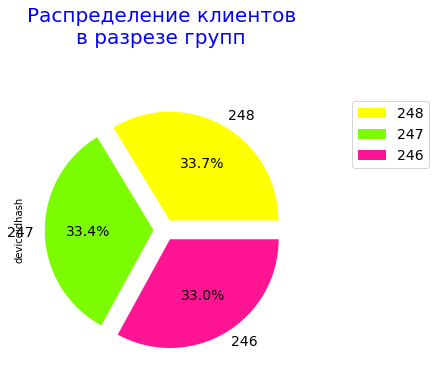

In [225]:
# Построим груговую диаграмму и увидим доли клиентов в группах
exp = (0.1,0.1,0.1)
data.groupby('expid')['deviceidhash'].agg('nunique').sort_values(ascending=False)\
            .plot(kind='pie',figsize=(5,5),colors = ['yellow','LawnGreen','DeepPink','DodgerBlue'], \
              autopct='%1.1f%%',fontsize=14, explode=exp)
plt.title('Распределение клиентов \nв разрезе групп \n\n', fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=0, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")

plt.show()

Мы вновь можем утверждать, что клиенты распределены между группами достаточно равномерно - разница между минимальным и максимальным количеством клиентов в группе составляет = 0,7 / 33,0 = 2,21%.  
Но нужно заметить, что при проведении статистических тестов желательное различие количества клиентов в группах не должно превышать более, чем 1%, иначе выводы по результатам теста могут искажаться.

### Проверка корректности разбиения на контрольные группы.
- Выберем самое популярное событие. 
- Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. 
- Посчитаем долю пользователей, совершивших это событие. 
- Проверим, будет ли отличие между группами статистически достоверным. 
- Проделаем то же самое для всех других событий. 
- Проверим корректность разбиения на контрольные группы.

#### Самое популярное событие в данном тесте - это «MainScreenAppear» («Появляется главный экран»), в п.4.2 мы выяснили, что оно присутствует у 98,5% пользователей, посетивших приложение.  
Посчитаем число и долю пользователей от общего числа посетивших приложение, совершивших это событие в каждой из контрольных групп.  
Для этой цели создадим функцию ```users_and_events```.<br>        
Рассчитаем в ней количество и доли пользователей по каждому из возможных событий.

In [226]:
# Создаем функцию, рассчитывающую количество пользователей в каждой группе, совершивших то или иное действие 
# и их долю к общему количеству пользователдей, посетивших приложение.
def users_and_events(group):
    # Количество пользователей, которые совершали каждое из событий.
    user_name_pie = data.query('expid == @group').groupby(by='eventname_rus')['deviceidhash'].agg({'nunique'})
    # Для расчета доли пользователей, которые хоть раз совершали событие, разделим вычеисленное выше количество
    # пользователей, которые совершали каждое из событий на общее количесмтво уникальных пользователей в датафрейме data
    # Результат представим в процентах и округлим до одного знака после запятой
    user_name_pie['pie'] = (user_name_pie['nunique']/data['deviceidhash'].nunique())
    return user_name_pie.sort_values('nunique', ascending = False).reset_index()
     

#### Посчитаем число пользователей, совершивших свмое популярное событие, а также и иные события в каждой из контрольных групп.

In [227]:
# Рассчитаем для группы 246 и сохраним в переменную ```users_and_events_246``` количество пользователей, 
#совершивших то или иное действие и их долю к общему количеству пользователдей, посетивших приложение.
users_and_events_246 = users_and_events(246)
users_and_events_246

,eventname_rus,nunique,pie
0,Появляется главный экран,2450,32.5%
1,Появление экрана предложений,1542,20.5%
2,Появляется экран корзины,1266,16.8%
3,Экран оплаты успешен,1200,15.9%
4,Учебное пособие,278,3.7%


In [228]:
# Также сейчас и для группы 247 рассчитаем и сохраним в переменную ```users_and_events_247``` количество пользователей, 
# совершивших то или иное действие и их долю к общему количеству пользователей, посетивших приложение.

users_and_events_247 = users_and_events(247)
users_and_events_247

,eventname_rus,nunique,pie
0,Появляется главный экран,2476,32.9%
1,Появление экрана предложений,1520,20.2%
2,Появляется экран корзины,1238,16.4%
3,Экран оплаты успешен,1158,15.4%
4,Учебное пособие,283,3.8%


Соединим полученные переменные в новую таблицу ```users_and_events_contr_groups``` и проанализируем данные

In [229]:
users_and_events_contr_groups = users_and_events_246.merge(users_and_events_247
                                                          , on='eventname_rus', suffixes = [246, 247])
users_and_events_contr_groups['delta_246_247'] = abs(\
            users_and_events_contr_groups['nunique247'] / users_and_events_contr_groups['nunique246'] - 1)
users_and_events_contr_groups

,eventname_rus,nunique246,pie246,nunique247,pie247,delta_246_247
0,Появляется главный экран,2450,32.5%,2476,32.9%,1.1%
1,Появление экрана предложений,1542,20.5%,1520,20.2%,1.4%
2,Появляется экран корзины,1266,16.8%,1238,16.4%,2.2%
3,Экран оплаты успешен,1200,15.9%,1158,15.4%,3.5%
4,Учебное пособие,278,3.7%,283,3.8%,1.8%


**Вывод по разделу**
Доли в группах в разрезе событий различаются между собой в пределах от 1,1 до 3,5%.   
Нужно проверить, является ли такое отличие между группами статистически значимым для всех событий.

#### Выявим наличие статистической разницы между группами для А/А теста
Проверим, находят ли статистические критерии разницу между выборками 246 и 247.   
**Проверим гипотезу о равенстве долей**,   

Сформулируем нулевую гипотезу: между посетителями контрольных групп (групп 246 и 247) отсутствует статистически значимая разница доли (конверсии) посетителей, открывших приложение и посетителей, совершающих каждое из событий.  
Сформулируем и альтернативную гипотезу: между посетителями контрольных групп (групп 246 и 247) существует статистически значимая разница доли (конверсии) посетителей, открывших приложение и посетителей, совершающих каждое из событий.  


Создадим фунуцию ```prepare_test```, которая будет рассчитывать количество уникальных посетителей для произвольной страницы приложения.   
Создадим фунуцию ```z_test```, для расчета статистического теста.

Нам предстоит просести несколько сравнений, проводимых на одних и тех же данных — это множественный тест. Его важная особенность в том, что с каждой новой проверкой гипотезы растёт вероятность ошибки первого рода. Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, применяют разные методы корректировки уровня статистической значимости. Наиболее распостраненным, но при этом и наиболее грубым является Метод Бонферрони (поправка Бонферрони).   
В самом начале нашего исслеодования мы анонсировали, что будут проверены 4 гипотезы. В ходе исследования мы обнаружили 4 ступени воронки. Таким образом, нам предстоит произвести (умножим 4 гипотезы на 4 ступени) 16 проверок гипотез, 16 сравнений.  
Учитывая сказанное примем размер поправки Бонферонни равным 16

In [230]:
'''
def prepare_test (group, event):
    if event == 'total':
        # общее количество посетителей приложения в заданной группе за период теста
        visitors_in_group = data.query('expid == @group').agg({'deviceidhash':'nunique'})
        print ('Общее количество посетителей приложения в группе {}:  '.format(group), visitors_in_group[0])
        
    else:
        # Количество посетителей сайта в заданной группе за период теста
        visitors_in_group = data.query('expid == @group and eventname == @event').agg({'deviceidhash':'nunique'})
        print ('Количество посетителей страницы {} в группе {}: \t'.format(event, group), visitors_in_group[0])        
    return visitors_in_group
'''    

"\ndef prepare_test (group, event):\n    if event == 'total':\n        # общее количество посетителей приложения в заданной группе за период теста\n        visitors_in_group = data.query('expid == @group').agg({'deviceidhash':'nunique'})\n        print ('Общее количество посетителей приложения в группе {}:  '.format(group), visitors_in_group[0])\n        \n    else:\n        # Количество посетителей сайта в заданной группе за период теста\n        visitors_in_group = data.query('expid == @group and eventname == @event').agg({'deviceidhash':'nunique'})\n        print ('Количество посетителей страницы {} в группе {}: \t'.format(event, group), visitors_in_group[0])        \n    return visitors_in_group\n"

In [231]:
def prepare_test (group, event):
    # общее количество посетителей приложения в заданной группе за период теста
    visitors_trials = data.query('expid == @group').agg({'deviceidhash':'nunique'})
    print ('Общее количество посетителей приложения в группе {}:  '.format(group), visitors_trials[0])
       
    # Количество посетителей сайта в заданной группе за период теста
    visitors_successes = data.query('expid == @group and eventname == @event').agg({'deviceidhash':'nunique'})
    print ('Количество посетителей страницы {} в группе {}: \t'.format(event, group), visitors_successes[0])        
    return visitors_trials, visitors_successes

In [232]:
def z_test (group1, group2, event, bonferonni = 16):
    #Сравним доли клиентов, сделавших заказ. 
    # зададим критический уровень статистической значимости
    alpha = 0.05 
    # применим поправку Бонферонни
    alpha_bonferonni = alpha / bonferonni
    # статистика успехов
    successes = np.array([prepare_test(group1, event)[1], prepare_test(group2, event)[1]])
    # статистика просмотров
    trials = np.array([prepare_test(group1, event)[0], prepare_test(group2, event)[0]])
    
    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]
    
    print (successes[0], successes[1],trials[0], trials[1])
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2
    
#Посчитаем статистику в стандартных отклонениях стандартного нормального распределения: 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 
    
# Если бы пропорции были равны, разница между ними была бы равна нулю. Посчитаем, как далеко статистика уехала от нуля. Какова вероятность получить такое отличие или больше? Применим метод cdf(). Саму статистику возьмём по модулю методом abs() — чтобы получить правильный результат независимо от её знака. Это возможно, потому что тест двусторонний. По этой же причине удваиваем результат:

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', round(p_value[0],3))

    if p_value < alpha_bonferonni:
        print("\033[31m {}" .format('Отвергаем нулевую гипотезу: между долями есть значимая разница'))
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )
             
    return    

**Конверсия перехода на главный экран**   
Вычислим  (в контрольных группах 246 и 247) общее количество посетителей приложения и количество посетителей, совершивших событие:
- открывших страницу главного экрана MainScreenAppear

Проведем статистический тест, сравним доли клиентов, совершивших указанные события и проверим гипотезу.\
Вызовем функцию ```z_test```

In [233]:
z_test(246, 247, 'MainScreenAppear')

Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы MainScreenAppear в группе 246: 	 2450
Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы MainScreenAppear в группе 247: 	 2476
Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы MainScreenAppear в группе 246: 	 2450
Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы MainScreenAppear в группе 247: 	 2476
[2450] [2476] [2484] [2513]
p-значение:  0.757
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Конверсия перехода на экран предложений**   
Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:
- открывших страницу экрана предложений OffersScreenAppear 

 и проверим гипотезу.

In [234]:
z_test(246, 247, 'OffersScreenAppear')

Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы OffersScreenAppear в группе 246: 	 1542
Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы OffersScreenAppear в группе 247: 	 1520
Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы OffersScreenAppear в группе 246: 	 1542
Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы OffersScreenAppear в группе 247: 	 1520
[1542] [1520] [2484] [2513]
p-значение:  0.248
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Конверсия перехода на экран корзины**   
Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:
- открывших страницу экрана корзины CartScreenAppear

 и проверим гипотезу.

In [235]:
z_test(246, 247, 'CartScreenAppear')

Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы CartScreenAppear в группе 246: 	 1266
Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы CartScreenAppear в группе 247: 	 1238
Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы CartScreenAppear в группе 246: 	 1266
Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы CartScreenAppear в группе 247: 	 1238
[1266] [1238] [2484] [2513]
p-значение:  0.229
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Конверсия перехода на экран оптаты**   
Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:
- открывших страницу экрана оплаты  PaymentScreenSuccessful   
 и проверим гипотезу.

In [236]:
z_test(246, 247, 'PaymentScreenSuccessful')

Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы PaymentScreenSuccessful в группе 246: 	 1200
Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы PaymentScreenSuccessful в группе 247: 	 1158
Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы PaymentScreenSuccessful в группе 246: 	 1200
Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы PaymentScreenSuccessful в группе 247: 	 1158
[1200] [1158] [2484] [2513]
p-значение:  0.115
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод по разделу**  
На всех этапах воронки при заданном уровне статистическрй значимости 0.05 нам не удалось выявить статистически значимую разницу между контрольными группами. Следовательно, нам не удалось выявить статистически значимую разницу между контрольными группами и в целом.
Следовательно, не удалось отвергнуть гипотезу об отсутствии  статистически значимой разницы доли (конверсии) посетителей, открывших приложение и посетителей, совершающих каждое из событий.  

Наличие статистической разницы между группами для А/А теста не может быть нами подтверждено.

### Сравнение результатов теста экспериментальной группы (248) с данными контрольных групп
Проведем аналогичное исследование и сравним данные экспериментальной группы (248) с данными контрольных групп в отдельности по каждому событию.   
Сравним результаты с объединённой контрольной группой.   
Какие выводы из эксперимента можно сделааем выводы.`

#### Рассчитаем для группы 248 и сохраним в переменную ```users_and_events_248``` количество пользователей, 
совершивших то или иное действие и их долю к общему количеству пользователей, посетивших приложение.


In [237]:
# Рассчитаем для группы 246 и сохраним в переменную ```users_and_events_246``` количество пользователей, 
#совершивших то или иное действие и их долю к общему количеству пользователдей, посетивших приложение.
users_and_events_248 = users_and_events(248)
users_and_events_248.columns = ['eventname_rus', 'nunique248', 'pie248']
users_and_events_248

,eventname_rus,nunique248,pie248
0,Появляется главный экран,2493,33.1%
1,Появление экрана предложений,1531,20.3%
2,Появляется экран корзины,1230,16.3%
3,Экран оплаты успешен,1181,15.7%
4,Учебное пособие,279,3.7%


Присоединим полученную переменную к ранее созданной таблице ```users_and_events_contr_groups``` и проанализируем данные

In [238]:
users_and_events_contr_groups = users_and_events_contr_groups.merge(users_and_events_248
                                                          , on='eventname_rus')
users_and_events_contr_groups['delta_246_248'] = abs(\
            users_and_events_contr_groups['nunique248'] / users_and_events_contr_groups['nunique246'] - 1)
users_and_events_contr_groups['delta_247_248'] = abs(\
            users_and_events_contr_groups['nunique248'] / users_and_events_contr_groups['nunique247'] - 1)

users_and_events_contr_groups

,eventname_rus,nunique246,pie246,nunique247,pie247,delta_246_247,nunique248,pie248,delta_246_248,delta_247_248
0,Появляется главный экран,2450,32.5%,2476,32.9%,1.1%,2493,33.1%,1.8%,0.7%
1,Появление экрана предложений,1542,20.5%,1520,20.2%,1.4%,1531,20.3%,0.7%,0.7%
2,Появляется экран корзины,1266,16.8%,1238,16.4%,2.2%,1230,16.3%,2.8%,0.6%
3,Экран оплаты успешен,1200,15.9%,1158,15.4%,3.5%,1181,15.7%,1.6%,2.0%
4,Учебное пособие,278,3.7%,283,3.8%,1.8%,279,3.7%,0.4%,1.4%


**Вывод по разделу**    
Доли между экспериментальной и контрольной группами в разрезе событий имеют различие пределах от 0,7 до 2,8%.
Но само по себе различие мало что говорит.   
Нужно проверить, является ли такое отличие между группами статистически значимым для всех событий.

#### Проверим, находят ли статистические критерии разницу между выборками 246 и 248.   
##### Проверим гипотезу о равенстве долей (конверсии) между посетителями группы 246 и  группы 248
 
**Проверим гипотезу о равенстве долей**,   

Сформулируем нулевую гипотезу: между посетителями контрольной группы 246 и экспериментальной группы 248 отсутствует статистически значимая разница доли (конверсии) посетителей, открывших приложение и посетителей, совершающих каждое из событий.
Сформулируем и альтернативную гипотезу: между посетителями  контрольной группы 246 и экспериментальной группы 248 существует статистически значимая разница доли (конверсии) посетителей, открывших приложение и посетителей, совершающих каждое из событий.

**Конверсия перехода на главный экран**   
Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:

- открывших страницу экрана предложений MainScreenAppear

 и проверим гипотезу.

Проведем статистический тест, сравним доли клиентов, совершивших указанные события и проверим гипотезу.\
Вызовем функцию ```z_test```

In [239]:
z_test(246, 248, 'MainScreenAppear')

Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы MainScreenAppear в группе 246: 	 2450
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы MainScreenAppear в группе 248: 	 2493
Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы MainScreenAppear в группе 246: 	 2450
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы MainScreenAppear в группе 248: 	 2493
[2450] [2493] [2484] [2537]
p-значение:  0.295
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Конверсия перехода на экран предложений**   

Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:

- открывших страницу экрана предложений OffersScreenAppear

 и проверим гипотезу.

In [240]:
z_test(246, 248, 'OffersScreenAppear')

Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы OffersScreenAppear в группе 246: 	 1542
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы OffersScreenAppear в группе 248: 	 1531
Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы OffersScreenAppear в группе 246: 	 1542
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы OffersScreenAppear в группе 248: 	 1531
[1542] [1531] [2484] [2537]
p-значение:  0.208
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Конверсия перехода на экран корзины**  

Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:

- открывших страницу экрана предложений CartScreenAppear

 и проверим гипотезу.

In [241]:
z_test(246, 248, 'CartScreenAppear')

Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы CartScreenAppear в группе 246: 	 1266
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы CartScreenAppear в группе 248: 	 1230
Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы CartScreenAppear в группе 246: 	 1266
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы CartScreenAppear в группе 248: 	 1230
[1266] [1230] [2484] [2537]
p-значение:  0.078
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Конверсия перехода на экран оплаты**   

 Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:

- открывших страницу экрана предложений PaymentScreenSuccessful

 и проверим гипотезу.

In [242]:
z_test(246, 248, 'PaymentScreenSuccessful')

Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы PaymentScreenSuccessful в группе 246: 	 1200
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы PaymentScreenSuccessful в группе 248: 	 1181
Общее количество посетителей приложения в группе 246:   2484
Количество посетителей страницы PaymentScreenSuccessful в группе 246: 	 1200
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы PaymentScreenSuccessful в группе 248: 	 1181
[1200] [1181] [2484] [2537]
p-значение:  0.212
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод по разделу**  
На всех этапах воронки при заданном уровне статистическрй значимости 0.05 и поправке Бонферонни = 16 (по числу сравнений) нам не удалось выявить статистически значимую разницу между между контрольной группой 246 и экспериментальной группой 248.     
Следовательно, нам  и в целом не удалось выявить статистически значимую разницу между контрольной группой 246 и экспериментальной группой 248.   
И следовательно, не удалось отвергнуть гипотезу об отсутствии  статистически значимой разницы доли (конверсии) посетителей, принадлежащих к этим группам, открывших приложение и посетителей, совершающих каждое из событий.  

Наличие статистической разницы между контрольной группой 246 и экспериментальной группой 248 не может быть нами подтверждено.

##### Проверим гипотезу о равенстве долей (конверсии) между посетителями группы 247 и  группы 248
Сформулируем нулевую гипотезу: между посетителями контрольной группы 247 и экспериментальной группы 248 отсутствует статистически значимая разница доли (конверсии) посетителей, открывших приложение и посетителей, совершающих каждое из событий.
Сформулируем и альтернативную гипотезу: между посетителями  контрольной группы 247 и экспериментальной группы 248 существует статистически значимая разница доли (конверсии) посетителей, открывших приложение и посетителей, совершающих каждое из событий.

**Конверсия перехода на главный экран**   
Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:

- открывших страницу экрана предложений MainScreenAppear

 и проверим гипотезу.

Проведем статистический тест, сравним доли клиентов, совершивших указанные события и проверим гипотезу.\
Вызовем функцию ```z_test```

In [243]:
z_test(247, 248, 'MainScreenAppear')

Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы MainScreenAppear в группе 247: 	 2476
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы MainScreenAppear в группе 248: 	 2493
Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы MainScreenAppear в группе 247: 	 2476
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы MainScreenAppear в группе 248: 	 2493
[2476] [2493] [2513] [2537]
p-значение:  0.459
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Конверсия перехода на экран предложений**   

Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:

- открывших страницу экрана предложений OffersScreenAppear

 и проверим гипотезу.

In [244]:
z_test(247, 248, 'OffersScreenAppear')

Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы OffersScreenAppear в группе 247: 	 1520
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы OffersScreenAppear в группе 248: 	 1531
Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы OffersScreenAppear в группе 247: 	 1520
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы OffersScreenAppear в группе 248: 	 1531
[1520] [1531] [2513] [2537]
p-значение:  0.92
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Конверсия перехода на экран корзины**  

Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:

- открывших страницу экрана предложений CartScreenAppear

 и проверим гипотезу.

In [245]:
z_test(247, 248, 'CartScreenAppear')

Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы CartScreenAppear в группе 247: 	 1238
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы CartScreenAppear в группе 248: 	 1230
Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы CartScreenAppear в группе 247: 	 1238
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы CartScreenAppear в группе 248: 	 1230
[1238] [1230] [2513] [2537]
p-значение:  0.579
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Конверсия перехода на экран оплаты**   

 Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:

- открывших страницу экрана предложений PaymentScreenSuccessful

 и проверим гипотезу.

In [246]:
z_test(247, 248, 'PaymentScreenSuccessful')

Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы PaymentScreenSuccessful в группе 247: 	 1158
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы PaymentScreenSuccessful в группе 248: 	 1181
Общее количество посетителей приложения в группе 247:   2513
Количество посетителей страницы PaymentScreenSuccessful в группе 247: 	 1158
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы PaymentScreenSuccessful в группе 248: 	 1181
[1158] [1181] [2513] [2537]
p-значение:  0.737
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод по разделу**  
На всех этапах воронки при заданном уровне статистическрй значимости 0.05 и поправке Бонферонни = 16 (по числу сравнений) нам не удалось выявить статистически значимую разницу между между контрольной группой 246 и экспериментальной группой 248.     
Следовательно, нам  и в целом не удалось выявить статистически значимую разницу между контрольной группой 246 и экспериментальной группой 248.   
И следовательно, не удалось отвергнуть гипотезу об отсутствии  статистически значимой разницы доли (конверсии) посетителей, принадлежащих к этим группам, открывших приложение и посетителей, совершающих каждое из событий.  

Наличие статистической разницы между контрольной группой 246 и экспериментальной группой 248 не может быть нами подтверждено.

##### Проверим гипотезу о равенстве долей (конверсии) между посетителями объединенных групп 246 и 247 и  группы 248
Сформулируем нулевую гипотезу: между посетителями объединенных контрольных группы 246 и 247 и экспериментальной группы 248 отсутствует статистически значимая разница доли (конверсии) посетителей, открывших приложение и посетителей, совершающих каждое из событий.    
Сформулируем и альтернативную гипотезу: между посетителями объединенных контрольных группы 246 и 247 и экспериментальной группы 248  существует статистически значимая разница доли (конверсии) посетителей, открывших приложение и посетителей, совершающих каждое из событий.   

**Конверсия перехода на главный экран**   

Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:

открывших страницу экрана предложений MainScreenAppear

и проверим гипотезу.\
Модернизируем функцию ```prepare_test``` под требование задачи.   
Вызовем функцию ```z_test```

In [247]:
def prepare_test (group, event):
    if group == 248:
        # общее количество посетителей приложения в заданной группе за период теста
        visitors_trials = data.query('expid == @group').agg({'deviceidhash':'nunique'})
        print ('Общее количество посетителей приложения в группе {}:  '.format(group), visitors_trials[0])
       
        # Количество посетителей сайта в заданной группе за период теста
        visitors_successes = data.query('expid == @group and eventname == @event').agg({'deviceidhash':'nunique'})
        print ('Количество посетителей страницы {} в группе {}: \t'.format(event, group), visitors_successes[0])        

    else:
        # общее количество посетителей приложения в заданной группе за период теста
        visitors_trials = data.query('expid <= @group').agg({'deviceidhash':'nunique'})
        print ('Общее количество посетителей приложения в группе {}:  '.format(group), visitors_trials[0])
       
        # Количество посетителей сайта в заданной группе за период теста
        visitors_successes = data.query('expid <= @group and eventname == @event').agg({'deviceidhash':'nunique'})
        print ('Количество посетителей страницы {} в группе {}: \t'.format(event, group), visitors_successes[0])        
    return visitors_trials, visitors_successes        


In [248]:
z_test(247, 248, 'MainScreenAppear')

Общее количество посетителей приложения в группе 247:   4997
Количество посетителей страницы MainScreenAppear в группе 247: 	 4926
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы MainScreenAppear в группе 248: 	 2493
Общее количество посетителей приложения в группе 247:   4997
Количество посетителей страницы MainScreenAppear в группе 247: 	 4926
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы MainScreenAppear в группе 248: 	 2493
[4926] [2493] [4997] [2537]
p-значение:  0.294
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Конверсия перехода на экран предложений**   

Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:

- открывших страницу экрана предложений OffersScreenAppear

 и проверим гипотезу.

In [249]:
z_test(247, 248, 'OffersScreenAppear')

Общее количество посетителей приложения в группе 247:   4997
Количество посетителей страницы OffersScreenAppear в группе 247: 	 3062
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы OffersScreenAppear в группе 248: 	 1531
Общее количество посетителей приложения в группе 247:   4997
Количество посетителей страницы OffersScreenAppear в группе 247: 	 3062
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы OffersScreenAppear в группе 248: 	 1531
[3062] [1531] [4997] [2537]
p-значение:  0.434
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Конверсия перехода на экран корзины**  

Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:

- открывших страницу экрана предложений CartScreenAppear

 и проверим гипотезу.

In [250]:
z_test(247, 248, 'CartScreenAppear')

Общее количество посетителей приложения в группе 247:   4997
Количество посетителей страницы CartScreenAppear в группе 247: 	 2504
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы CartScreenAppear в группе 248: 	 1230
Общее количество посетителей приложения в группе 247:   4997
Количество посетителей страницы CartScreenAppear в группе 247: 	 2504
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы CartScreenAppear в группе 248: 	 1230
[2504] [1230] [4997] [2537]
p-значение:  0.182
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Конверсия перехода на экран оплаты**   

 Проведем статистический тест, сравним доли общего количества посетителей приложения и количество посетителей, совершивших событие:

- открывших страницу экрана предложений PaymentScreenSuccessful

 и проверим гипотезу.

In [251]:
z_test(247, 248, 'PaymentScreenSuccessful')

Общее количество посетителей приложения в группе 247:   4997
Количество посетителей страницы PaymentScreenSuccessful в группе 247: 	 2358
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы PaymentScreenSuccessful в группе 248: 	 1181
Общее количество посетителей приложения в группе 247:   4997
Количество посетителей страницы PaymentScreenSuccessful в группе 247: 	 2358
Общее количество посетителей приложения в группе 248:   2537
Количество посетителей страницы PaymentScreenSuccessful в группе 248: 	 1181
[2358] [1181] [4997] [2537]
p-значение:  0.6
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод по разделу**  
На всех этапах воронки при заданном уровне статистическрй значимости 0.05 и поправке Бонферонни = 16 (по числу сравнений) нам не удалось выявить статистически значимую разницу между посетителями объединенных контрольных групп 246 и 247 и экспериментальной группой 248 .     
Следовательно, нам  и в целом не удалось выявить статистически значимую разницу между посетителями объединенных контрольных групп 246 и 247 и экспериментальной группой 248 .
И следовательно, не удалось отвергнуть гипотезу об отсутствии  статистически значимой разницы доли (конверсии) посетителей, принадлежащих к этим группам, открывших приложение и посетителей, совершающих каждое из событий.  

Наличие статистической разницы между посетителями объединенных контрольных групп 246 и 247 и экспериментальной группой 248  не может быть нами подтверждено.

### Уровень статистической значимости. Его влияние на результаты теста.
1. Выбранный уровень значимости вы выбрали при проверке статистических гипотез
2. Количество сделанных при исследовании  проверок статистических гипотез
3. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? 
4. Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

1.	При проведении статистического теста нами был выбран один из общеиспользуемых уровней статистической значимости - 5%

2.  При проведении исследования было выполнено 16 проверок статистического теста:
- между двумя контрольными группами
- между каждой из контрольных групп и экспериментальной группой
- между объединенной контрольной группой и экспериментальной группой   
в каждом из указанных выше разделов - по 4 теста - по количеству ступеней воронки:
- «MainScreenAppear» - «Появляется главный экран»	
- «OffersScreenAppear» - «Появление экрана предложений»	
- «CartScreenAppear» - «Появляется экран корзины»	
- «PaymentScreenSuccessful» -«Экран оплаты успешен»	

3.	 Нулевая гипотеза отвергается, если вероятность получить среднее, рассчитанное по выборочным данным, слишком мала. В наших расчетах – меньше уровня статистической значимости.
-	Уровень значимости численно определяет, где проходит граница.  
-	 Уровень значимости задаёт порог: начиная с какой вероятности наблюдаемое значение считается слишком далёким от предполагаемого, то есть слишком маловероятным.
-	Уровнем значимости задаётся вероятность попасть слишком далеко от центра распределения.

Тогда чем выше уровень статистической значимости мы зададим для расчета, тем больше значений выборочных средних попадет за пределы установлено кровя, то есть значения будут меньше, чем установленный уровень статзначимости.
А раз так, то и вероятность того, что конкретный p-value будет меньше, чем уровень статзначимости, возрастает и возрастает вероятность отвергнуть нулевую гипотезу (которая проверяется на равенство средних двух выборок).
В данном исследовании нами был принят уровень статистической значимости, равный одному из общепринятых значений -  5%.  Если  мы увеличим уровень статистической значимости и зададим его равным 10%, то тем самым мы увеличим вероятность  получить наблюдаемое на выборке значение или более далёкое от предположенного в H0 при новом уровне статистической значимости (то есть 10%), то есть вероятность НЕ ПОДТВЕРДИТЬ нулевую гипотезу у нас вырастет. Для рассматриваемого исследования – у нас будет больше вероятность подтвердить, что внесенные изменения (шрифт) привели к результату. Но вот к какому – к изменениям в лучшую сторону или в худшую – покажет второй параметр  -  это относительный прирост среднего числа событий

При этом стоит заметить, что принято, что если p-value больше 10 %, то нулевую гипотезу точно не нужно отвергать. 
И поскольку цель нашего исследования - получить подтверждение именно различия между контрольной и экспериментальной группами, то увеличение порога статистической значимости, напомним, приведет в большей вероятности отвергнуть нулевую гипотеза (то есть отвергнуть гипотезу о равенстве) и принять альтернативную гипотезу (то есть как раз о наличии разницы между сравниваемыми группами.) Такая ситуация может поглядеть как желание "подкрасить" результаты, желание подвести их под желаемый результат - мол, вот шрифт изменили и у нас точно появилась разница.

И, кстати, давайте посмотрим, а к какую все-таки сторону меняются результаты? При сравнении объединенной контрольной группы с экспериментальной мы видим, что прирост среднего значения составляет по шагам воронки - 5,6%, 4,3%, 6,2%, 2,7%.    
Действительно, прирост есть, и увеличение порога статистической значимости можно истолковывать как желание оправдать совершенные изменения.

4. Собственно, по этой причине мы удержимся от изменения выдранного порога статистической значимости и оставим его на уровне 5%.
Вывод по результату теста - отсутствует возможность подтвердить, что внесенные изменения привели к статистически заметным изменениям в количестве событий (в конечном итоге - к количеству оформленных заказов).




## Выводы и заключения
### На этапе ознакомления и предобработки предоставленных данных мы выявили:
 - Данные в датафрейме разделены на 3 группы  - две контрольных и одна экспериментальная
-  присутствуют 413 дубликатов - они удалены
 - на этапе ознакомления с данными выявлено, что пропущенные данные отсутствуют
 - названия столбцов приведены к нижнему регистру
 - данные о датах и времени преобразованы в формат Datatime 
 - уникальные клиенты не дублируются в разных группах
 - датафрейм дополнен столбцом с названием событий на русском языке

### Исследовательский анализ предоставленных данных показал следующее:
•	В датафрейме представлены 5 событий, из них 4 события образуют воронку событий.<br>
•	Клиенты распределены между группами достаточно равномерно - разница между минимальным и максимальным количеством клиентов в группе составляет 2,21%.  Нужно заметить, что при проведении статистических тестов желательное различие количества клиентов в группах не должно превышать более, чем 1%, иначе выводы по результатам теста могут искажаться.<br>
•	Данные предоставлены за период с 25 июля по 7 августа 2019 года. Данные за период до 31 июля включительно удалены нами из исследования, поскольку в этот период данные теста представлены в незначительном объеме и не могут быть приняты к дальнейшему рассмотрению. <br>
•	Визуализируется наличие значительного различия в количестве действий в контрольных группах (246 и 247) в даты 1, 4 и 5 августа. Если между значениями A и A имеются существенные различия, это может обнаружить факторы, которые привели к искажению результатов.br>
•	Визуализируется воронка событий - переход от просмотра главного экрана на экран предложений, далее на экран корзины и на экран оплаты.<br>

### Изучение воронки событий
- почти половина событий - это "Появление главного экрана" - точки входа в мобильное приложение.
-  98,5% пользователей, принявших участие в тесте, посетили главный экран.
Не совсем пока понятно, какие действия предприняли оставшиеся 1,5% пользователей, который не посетили главный экран - таковых 115 пользователей, которые так и не зашли на главный экран приложения.
- воронка событий и выглядит она следующим образом:
 - 1. Появляется главный экран
 - 2. Появление экрана предложений
 - 3. Появляется экран корзины
 - 4. Экран оплаты успешен	
- На экран предложений - переходит только 61,9% пользователей, то есть чуть более 38% прекращают использовать приложение после просмотра главного экрана - и на этом этапе происходит наибольшая потеря пользователей.
 - Потери на двух следующих этапах заметно меньше, чем на предыдущим: на этап Корзины переходит уже более 81%, и далее - на экран Оплаты - почти 95% пользователей.
 - Результат конечной конверсии равен 47,7% - то есть менее половины пользователей, изначально посетивших приложение, совершили оплату заказа.


### Анализ А/A/B-теста. Проверка гипотез.

В ходе анализа A/B-теста мы выявили:
- минимально необходимое количество дней - 13, что соответствовало изначально запланированной продолжительности теста. - 
-  присутствует статистически значимое различие долей между контрольными группами 246 и 247. 
- Представленные данные не имеют нормального распределения
- В данных присутствуют выбросы (аномальные значения)
- Доли в группах в разрезе событий различаются между собой в пределах от 1,1 до 3,5%.
- Выбрано значение 95-го перцентиля на одного пользователя за верхнюю границу количества событий и отсеем аномальных пользователей по ней.
- в событиях «Экран оплаты успешен» присутствуют выбросы со значениями от 200 до 800 событий и это больше, чем количество просмотров главного экрана и свидетельствует об ошибке в данных 


Проверка гипотез   

Выдвинутые нами гипотезы при уровне статистической значимости = 0,05:
- для контрольных групп 246 и 247 не удалось отвергнуть гипотезу об отсутствии статистически значимой разницы доли (конверсии) посетителей, переходящих из одного события в другое событие 
- для контрольной группы 246 и экспериментальной группы 248 не удалось отвергнуть гипотезу об отсутствии статистически значимой разницы доли (конверсии) посетителей, переходящих из одного события в другое событие 
- для контрольных группы 247 и экспериментальной группы 248 не удалось опровергнуть гипотезу об отсутствии статистически значимой разницы доли (конверсии) посетителей, переходящих из одного события в другое событие 
- для объединенной контрольной группы 246+247 и экспериментальной группы 248не удалось отвергнуть гипотезу об отсутствии статистически значимой разницы доли (конверсии) посетителей, переходящих из одного события в другое событие 


### В результате исследования сформированы выводы:
- отсутствует возможность подтвердить статистически значимое различие в событиях при заданном уровне статистической значимости 0.05. То есть исследование не может подтвердить, что замена шрифта повлияла на частоту совершаемых пользователями событий.
- Возможно, что на такие результаты теста повлияли следующие не совсем корректные исходные данные :
  - Рассчитанное и запланированное время тести составило 13 дней. Фактически тест проводился только 7 дней 
